# Calculate the rapidity distribution of W bosons

Reproduce Figure 8.20 (right) in Section 8.3 with arbitrary units

Use. eq. 8.18 in Section 8.1 and LHAPDF PDF sets as shown in `pdf-lumi.ipynb`

In [3]:
import parton
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def WZrapidity(pdf, s, M , parton_a, parton_b):
    """
    Calculate the rapidity distribution if a particle with mass M

    Parameters:
    s : cms energy squared (GeV)
    M : particle mass (GeV)
    parton_a: code for partone a; 1,2,3,4,5: d,u,s,c,b; gluon: 21
    parton_b: code for parton b

    Return:
    Double diff. parton luminosity d^2 L/dyd\tau (see: eq. 8.18)
    """
    nbin = 100
    ay = np.empty(nbin)
    aL = np.empty(nbin)
    tau = M*M/s
    ymin = 0.5 * np.log(tau) # see section 8.1.1
    ymax = -0.5 * np.log(tau)

    dy = (ymax-ymin)/nbin
    if parton_a == parton_b:
        fac = 0.5
    else:
        fac = 1.
    for i in range(nbin):
        y = ymin + dy/2 + i*dy
        ay[i] = y
        xA = np.sqrt(tau)*np.exp(y)
        xB = np.sqrt(tau)*np.exp(-y)
        xfaA = pdf.xfxQ(parton_a, xA, Q=M) # use factorization scale M
        xfbB = pdf.xfxQ(parton_b, xB, Q=M)
        xfbA = pdf.xfxQ(parton_b, xA, Q=M)
        xfaB = pdf.xfxQ(parton_a, xB, Q=M)
        aL[i]= (xfaA*xfbB + xfbA*xfaB) * dy * fac / tau
        # apply factor for double counting
        # since xfxQ gives x f(x), dL contains factors xA*xB = tau, therefore divide by tau 
    return ay, aL

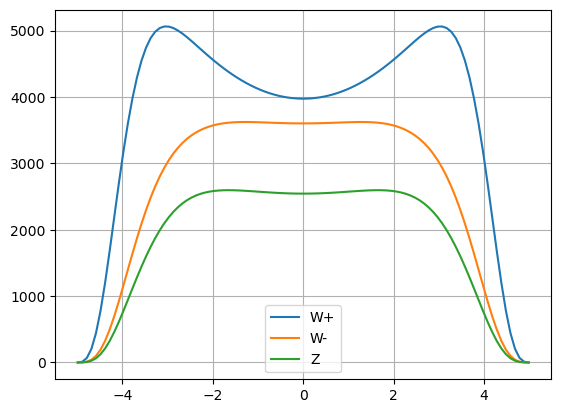

In [22]:
# calculate W and Z rapidity distributions
# compare to 
pdf = parton.mkPDF('CT18NNLO', 0)
MW =80.4
MZ = 91.2
s = (14E3)**2
ay, aWplus = WZrapidity(pdf, s, MW , 2, -1) # u dbar --> W+
ay, aWminus = WZrapidity(pdf, s, MW , -2, 1) # ubar d --> W- 
ay, aZ = WZrapidity(pdf, s, MZ, 1, -1) # d dbar --> Z
plt.plot(ay, aWplus, label="W+")
plt.plot(ay, aWminus, label="W-")
plt.plot(ay, aZ, label="Z")
plt.legend(loc='lower center')
plt.grid()


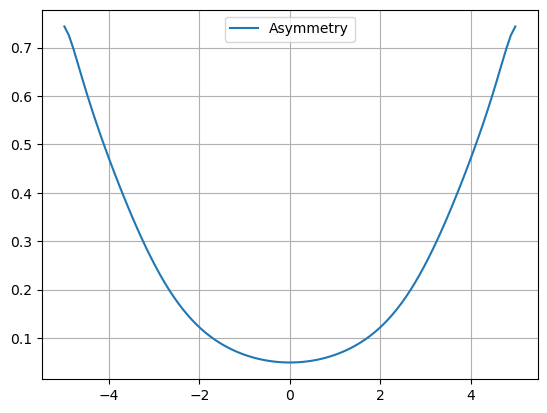

In [ ]:
# Calculate the asymmetry as shown in Figure 8.21
# In Figure 8.21 the asymmetry of the rapidity of decay muons is shown
# Here the rapidity of the W is used. 
sub = aWplus-aWminus
add = aWplus+aWminus
A = np.divide(sub,add)
plt.plot(ay, A, label="Asymmetry")
plt.legend(loc='upper center')
plt.grid()